# **Visual Information Processing Lab**

# Exploring Optimizers

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Files/')
print(os.getcwd())

/content/drive/My Drive/2021/MTech/Files


### Datasets and Pre Processing

In [3]:
import keras
from keras.datasets import mnist

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


In [6]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [7]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [8]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
from keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### LeNet Model

In [10]:
import keras
from keras import models
from keras import layers

In [11]:
from keras.regularizers import l1
import tensorflow as tf

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.Dense(84, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

model.add(layers.Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Compile and Training the model

In [13]:
os.chdir('/content/drive/My Drive/2021/MTech/Weights/')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

/content/drive/My Drive/2021/MTech/Weights


In [16]:
import keras
import tensorflow as tf

Adam = keras.optimizers.Adam(learning_rate=0.01)


RMS = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop")

Adadelta=tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta")


Adagrade=tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad")


Adamax=tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

Nadam=tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

In [17]:
model.compile(loss="categorical_crossentropy", optimizer=RMS, metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=10, verbose=1)

Epoch 1/10
188/188 [==============================] - 3s 12ms/step - loss: 2.5605 - accuracy: 0.1151 - val_loss: 2.3890 - val_accuracy: 0.1060

Epoch 00001: val_loss improved from 2.84121 to 2.38898, saving model to CNN_MNIST.h5
Epoch 2/10
188/188 [==============================] - 2s 11ms/step - loss: 2.4259 - accuracy: 0.1136 - val_loss: 2.3881 - val_accuracy: 0.1060

Epoch 00002: val_loss improved from 2.38898 to 2.38811, saving model to CNN_MNIST.h5
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 2.4263 - accuracy: 0.1120 - val_loss: 2.3894 - val_accuracy: 0.1060

Epoch 00003: val_loss did not improve from 2.38811
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 2.4259 - accuracy: 0.1149 - val_loss: 2.3901 - val_accuracy: 0.1060

Epoch 00004: val_loss did not improve from 2.38811
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 2.4261 - accuracy: 0.1150 - val_loss: 2.3914 - val_accuracy: 0.1060

Epoch 00

### Evaluate

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.9910 - accuracy: 0.8870


[0.9909968972206116, 0.8870000243186951]

### Prediction

In [ ]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[7.0840825e-04 2.7399169e-06 3.3215410e-04 4.4204192e-03 8.1285994e-05
  9.8195614e-04 1.9348488e-06 9.8396134e-01 2.0226034e-04 9.3074944e-03]]
7


In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9910 - accuracy: 0.8870
0.9909968972206116
0.8870000243186951


### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

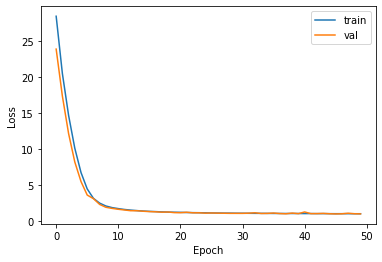

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

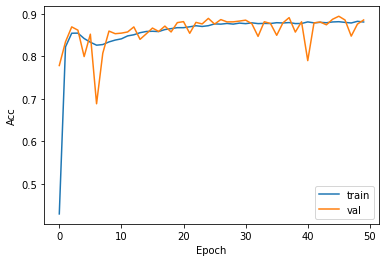

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])